In [262]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [119]:
#Load and read DF's
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [120]:
city_data_to_load = os.path.join('Resources/city_data.csv')
ride_data_to_load = os.path.join('Resources/ride_data.csv')

In [121]:
city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [122]:
ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [123]:
# Inspect DF's for missing, malformed, or incorrect data

city_data_df.isnull().sum() #or .count(); output shows there is no null data

city            0
driver_count    0
type            0
dtype: int64

In [124]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [125]:
# Get the number of data points from the Urban cities

sum(city_data_df['type']=='Urban')

66

In [126]:
sum(city_data_df['type'] == 'Rural')

18

In [127]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [128]:
ride_data_df.describe()

,fare,ride_id
count,2375.000000,2.375000e+03
mean,26.753112,4.887270e+12
std,12.109465,2.907361e+12
min,4.050000,3.218337e+08
25%,17.190000,2.381175e+12
50%,26.600000,4.748541e+12
75%,36.645000,7.461936e+12
max,58.550000,9.991538e+12


In [129]:
# Merge data frames
#new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on=['city','city'])

pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [130]:
#For the bubble chart, we will need to plot the following:

#The average fare for each type of city on the y-axis
#The total number of rides for each type of city on the x-axis
#Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city

#Here are the steps to create a bubble chart:

#To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
#To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
#To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.
#Completing the steps will be more efficient if we create separate DataFrames for each type and then create Data Series for each step.

In [131]:
#create city 'type' DataFrames by filtering the pyber_data_df
urban_cities_df = pyber_data_df[pyber_data_df['type']== 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']== 'Rural']


urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [132]:
#To create a Data Series with one of the columns in a DataFrame, 
#we can use the groupby() function and add the column inside the parentheses.
#Get the number of rides for each urban city

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [133]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [134]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [135]:
# Get average fare for each city in the urban cities.

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [136]:
suburban_avg_fare = suburban_cities_df.groupby('city').mean()['fare']

suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [137]:
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [138]:
# Get the average number of drivers for each type of city (urban, suburban, rural)

urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [139]:
#Our first task will be to create a scatter plot for each type of city where the following conditions are met:

#The x-axis is the number of rides for each city.
#The y-axis is the average fare for each city.
#The size of each marker is the average number of drivers in each city.

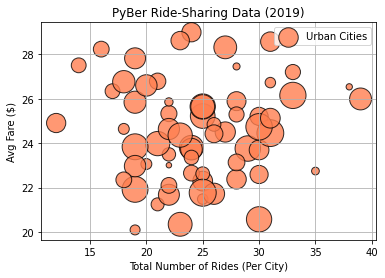

In [140]:
#Urban cities

plt.scatter(urban_ride_count, urban_avg_fare,
            s = [i * 10 for i in urban_driver_count],
            edgecolor = 'k',
            color = 'coral',
            alpha = .8,
            label = 'Urban Cities'
           )
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Avg Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.legend()
plt.grid()

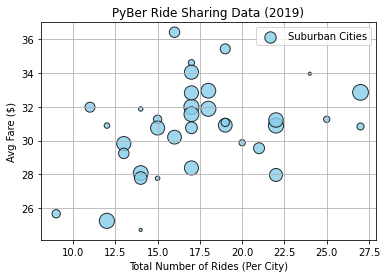

In [141]:
# Build the scatter plots for suburban cities.

plt.scatter(suburban_ride_count, suburban_avg_fare,
            s = [i*10 for i in suburban_driver_count],
            color = 'skyblue',
            edgecolor = 'k',
            alpha = .8,
            label = 'Suburban Cities'
           )
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Avg Fare ($)')
plt.title('PyBer Ride Sharing Data (2019)')
plt.legend()
plt.grid()

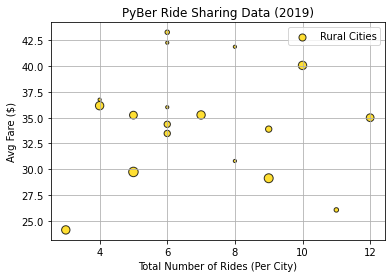

In [142]:
# Build the scatter plots for rural cities.

plt.scatter(rural_ride_count, rural_avg_fare,
            s = [i*10 for i in rural_driver_count],
            color = 'gold',
            edgecolor = 'k',
            alpha = .8,
            label = 'Rural Cities'
           )
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Avg Fare ($)')
plt.title('PyBer Ride Sharing Data (2019)')
plt.legend()
plt.grid()

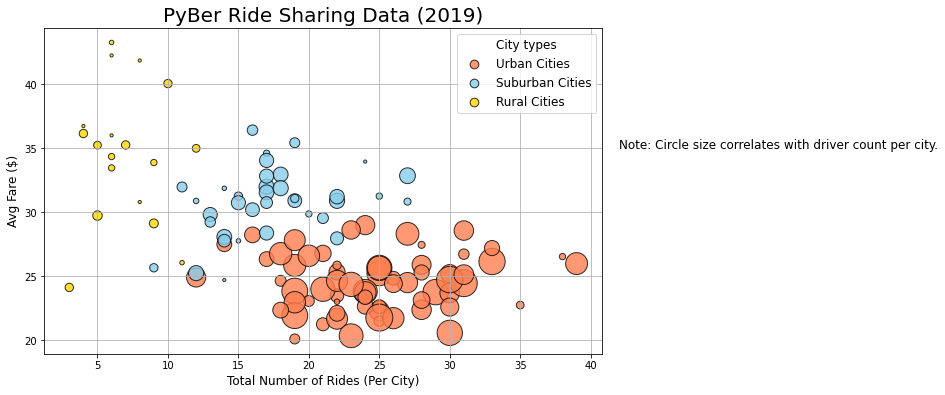

In [143]:
#Combine individual scatter plots into one

plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare,
            s = [i * 10 for i in urban_driver_count],
            edgecolor = 'k',
            color = 'coral',
            alpha = .8,
            label = 'Urban Cities'
           )

plt.scatter(suburban_ride_count, suburban_avg_fare,
            s = [i*10 for i in suburban_driver_count],
            color = 'skyblue',
            edgecolor = 'k',
            alpha = .8,
            label = 'Suburban Cities'
           )

plt.scatter(rural_ride_count, rural_avg_fare,
            s = [i*10 for i in rural_driver_count],
            color = 'gold',
            edgecolor = 'k',
            alpha = .8,
            label = 'Rural Cities'
           )

plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Avg Fare ($)', fontsize = 12)
plt.title('PyBer Ride Sharing Data (2019)', fontsize = 20)
plt.grid()

#Create customized legend
legend = plt.legend(fontsize = '12', mode = 'expanded',
                   scatterpoints = 1, loc = 'best', title = 'City types')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
legend.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#Save the figure
plt.savefig('analysis/Fig1.png')

plt.show()

In [144]:

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [152]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [153]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [154]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [156]:
round(urban_ride_count.mode()), round(suburban_ride_count.mode()), round(rural_ride_count.mode())

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [166]:
# Calculate the measures of central tendency for the ride count for the urban cities.

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [167]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_suburban_ride_count

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [168]:
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [178]:
# Get the fares for each city type
urban_fares = urban_cities_df['fare']

suburban_fares = suburban_cities_df['fare']

rural_fares = rural_cities_df['fare']

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [180]:
mean_urban_fares = round(urban_fares.mean(),2)
print(f'The mean fare price for urban trips is ${mean_urban_fares}.')

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares:.2f}.')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is ${mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [181]:
mean_suburban_fares = round(suburban_fares.mean(),2)
print(f'The mean fare price for suburban trips is ${mean_suburban_fares}.')

median_suburban_fares = np.median(suburban_fares)
print(f'The median fare price for suburban trips is ${median_suburban_fares:.2f}.')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode fare price for suburban trips is ${mode_suburban_fares}.')

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [182]:
mean_rural_fares = round(rural_fares.mean(),2)
print(f'The mean fare price for rural trips is ${mean_rural_fares}.')

median_rural_fares = np.median(rural_fares)
print(f'The median fare price for rural trips is ${median_rural_fares:.2f}.')

mode_rural_fares = sts.mode(rural_fares)
print(f'The mode fare price for rural trips is ${mode_rural_fares}.')

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [187]:
# Get the driver count data from each city type

urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']



In [198]:
#Calculate the mean, median, and mode for the urban, suburban, and rural driver count Series 
#using NumPy and SciPy statistics module.

mean_urban_drivers = np.mean(urban_drivers)
print(mean_urban_drivers)

median_urban_drivers = np.median(urban_drivers)
print(median_urban_drivers)

mode_urban_drivers = sts.mode(urban_drivers)
print(mode_urban_drivers)

36.67815384615385
37.0
ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [200]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(mean_suburban_drivers)

median_suburban_drivers = np.median(suburban_drivers)
print(median_suburban_drivers)

mode_suburban_drivers = sts.mode(suburban_drivers)
print(mode_suburban_drivers)

13.712
16.0
ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [202]:
mean_rural_drivers = np.mean(rural_drivers)
print(mean_rural_drivers)

median_rural_drivers = np.median(rural_drivers)
print(median_rural_drivers)

mode_rural_drivers = sts.mode(rural_drivers)
print(mode_rural_drivers)

4.296
4.0
ModeResult(mode=array([1], dtype=int64), count=array([32]))


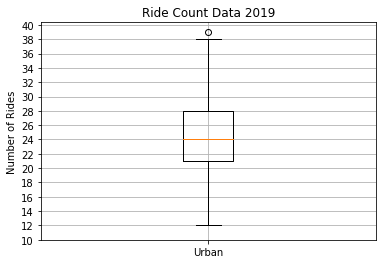

In [205]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

#Add the title, yaxis label and grid
ax.set_title('Ride Count Data 2019')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()

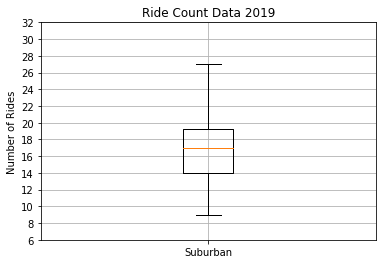

In [219]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

#Add the title, yaxis label and grid
ax.set_title('Ride Count Data 2019')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(6, 34, step = 2.0))
ax.grid()

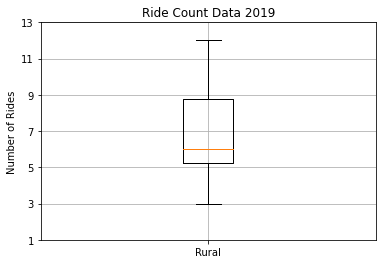

In [217]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

#Add the title, yaxis label and grid
ax.set_title('Ride Count Data 2019')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(1, 15, step = 2.0))
ax.grid()

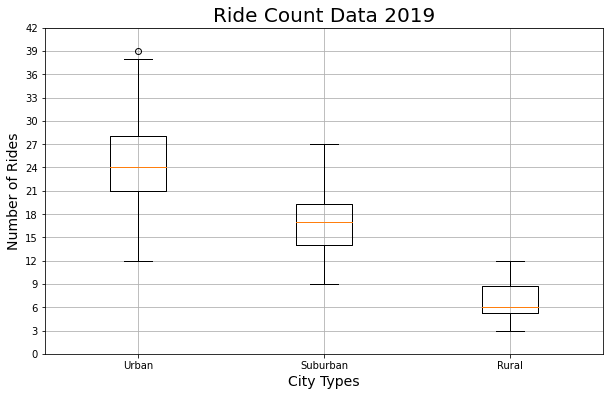

In [221]:
# Add all ride count box-and-whisker plots to the same graph.

x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(ride_count_data, labels = x_labels)

#Add the title, yaxis label and grid
ax.set_title('Ride Count Data 2019', fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()

#Save the figure.
plt.savefig('analysis/Fig2.png')
plt.show()

In [225]:
# Get the city that matches 39; the outlier

urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

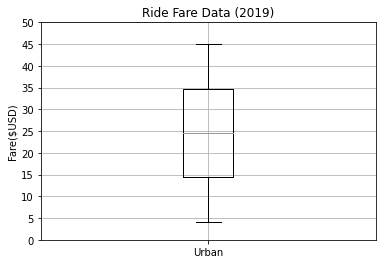

In [227]:
# Create a box-and-whisker plot for the urban fare data.

xlabels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = xlabels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

print('Summary Statistics')
urban_fares.describe()


Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

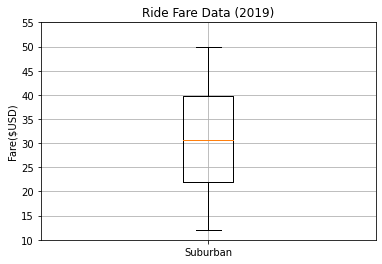

In [235]:
xlabels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = xlabels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10, 60, step=5.0))
ax.grid()

print('Summary Statistics')
suburban_fares.describe()

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

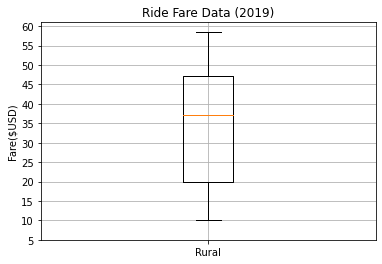

In [236]:
xlabels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = xlabels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 65, step=5.0))
ax.grid()

print('Summary Statistics')
rural_fares.describe()

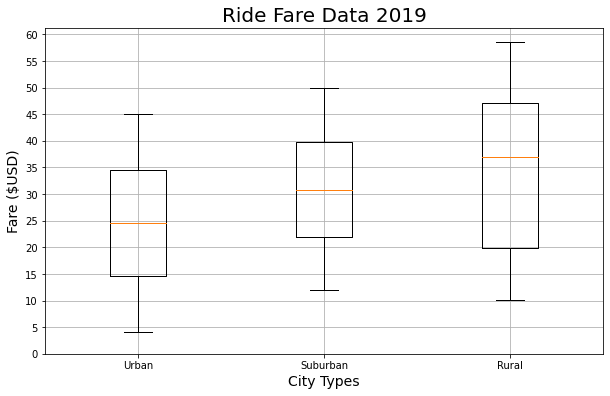

In [238]:
# Add all fares box-and-whisker plots to the same graph.

x_labels = ['Urban', 'Suburban', 'Rural']
fares_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(fares_data, labels = x_labels)

#Add the title, yaxis label and grid
ax.set_title('Ride Fare Data 2019', fontsize = 20)
ax.set_ylabel('Fare ($USD)', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0, 65, step = 5.0))
ax.grid()

#Save the figure.
plt.savefig('analysis/Fig3.png')
plt.show()

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

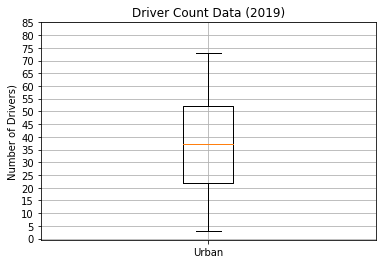

In [240]:
#Create a box-and-whisker plot for the urban drivers data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

print("Summary Statistics")
urban_drivers.describe()

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

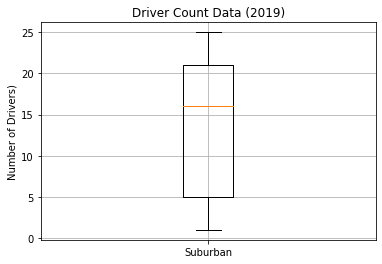

In [242]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()

print("Summary Statistics")
suburban_drivers.describe()

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

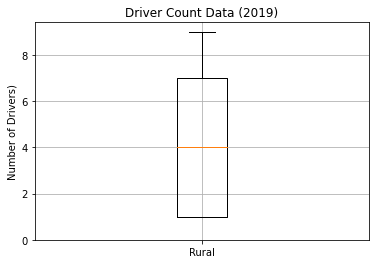

In [244]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=2.0))
ax.grid()

print("Summary Statistics")
rural_drivers.describe()

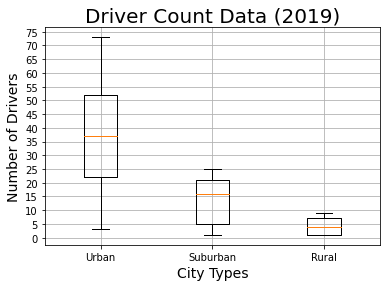

In [246]:
xlabels = ['Urban', 'Suburban', 'Rural']
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots()
ax.boxplot(driver_count_data, labels = xlabels)

ax.set_title('Driver Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Drivers', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0, 80, step = 5.0))
ax.grid()

#Save the figure.
plt.savefig('analysis/Fig4.png')
plt.show()

In [247]:
#Create pie chart showcasing % of city fares for each city type
#To create this pie chart, we will need to do the following:

#Get the total fares for each city type.
#Get the total for all the fares for all the city types.
#Calculate the percentage of the total fares for each city type.

In [250]:
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']

sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [252]:
total_fares = pyber_data_df['fare'].sum()

total_fares

63538.64

In [255]:
type_percents = sum_fares_by_type/total_fares * 100

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

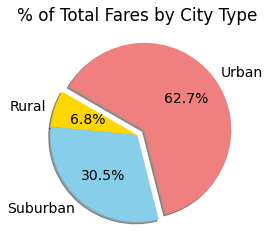

In [266]:
# Build the percentage of fares by city type pie chart.

plt.pie(type_percents, 
        labels = ['Rural', 'Suburban', 'Urban'],
        colors = ['gold', 'skyblue', 'lightcoral'],
        explode = [0,0,0.1],
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 150
       )
plt.title('% of Total Fares by City Type')

#***import matplotlib rc Params to change pie chart parameters***
mpl.rcParams['font.size'] = 14

plt.savefig('analysis/Fig5.png')
plt.show()

In [267]:
#Showcase the percentage of total rides for each type of city

#To create this pie chart, we need to do the following:
#Get the total number of rides for each city type.
#Get the total rides for all the city types.
#Calculate the percentage of the total rides for each city type.

In [269]:
pyber_data_df.groupby(['type']).count()['ride_id']


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [270]:
ride_percents = pyber_data_df.groupby(['type']).count()['ride_id']/pyber_data_df['ride_id'].count()*100

ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

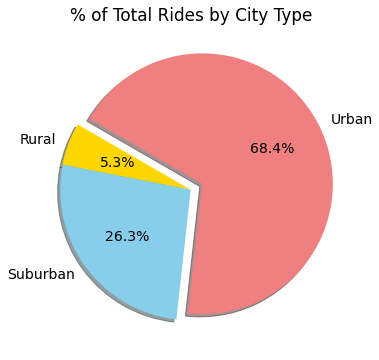

In [271]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
        labels = ['Rural', 'Suburban', 'Urban'],
        colors = ['gold', 'skyblue', 'lightcoral'],
        explode = [0,0,0.1],
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 150
       )
plt.title('% of Total Rides by City Type')

#***import matplotlib rc Params to change pie chart parameters***
mpl.rcParams['font.size'] = 14

plt.savefig('analysis/Fig6.png')
plt.show()

In [272]:
# % Total drivers for each city type
#To create this pie chart, we need to do the following:

#Get the total number of drivers for each city type.
#Get the total drivers for all the city types.
#Calculate the percentage of the total drivers for each city type.

In [274]:
pyber_data_df.groupby(['type']).sum()['driver_count']

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [277]:
driver_percents = pyber_data_df.groupby(['type']).sum()['driver_count']/pyber_data_df['driver_count'].sum() * 100

driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

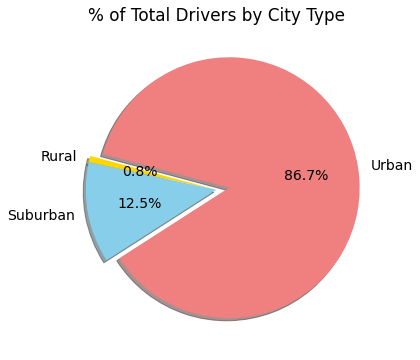

In [281]:
# Build percentage of drivers by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
        labels = ['Rural', 'Suburban', 'Urban'],
        colors = ['gold', 'skyblue', 'lightcoral'],
        explode = [0,0,0.1],
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 165
       )
plt.title('% of Total Drivers by City Type')

#***import matplotlib rc Params to change pie chart parameters***
mpl.rcParams['font.size'] = 14

plt.savefig('analysis/Fig7.png')
plt.show()